In [10]:
import numpy as np
from sklearn.mixture import GaussianMixture
import pandas as pd
import matplotlib.pyplot as plt

nomefile = '../graph/data/EstrazioneTamponi/4_picco_pandemico_raggruppato_per_DataOraAccettazione.csv'
data = pd.read_csv(nomefile, sep=',')

data.head()

# add rows Minutes = 1..1440 with Conteggio=0 where there is no data
for i in range(1, 1441):
    if not i in data['Minutes'].values:
        # data = data.append({'Minutes': i, 'Conteggio': 0}, ignore_index=True) #append is deprecated
        data = pd.concat([data, pd.DataFrame({'Minutes': [i], 'Conteggio': [0]})], ignore_index=True)

data = data.sort_values(by='Minutes')
data = data.reset_index(drop=True)

data.head()


,Conteggio,Minutes
0,0,1.0
1,0,2.0
2,0,3.0
3,0,4.0
4,0,5.0


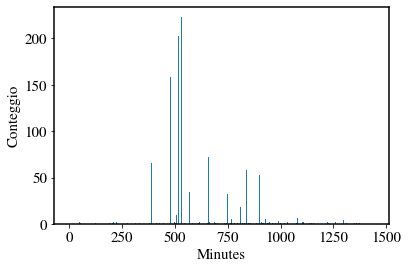

In [224]:
# plot minutes=x and conteggio=y

# plt.scatter(data['Minutes'], data['Conteggio'])
plt.hist(data['Minutes'], bins=int(1440/2), weights=data['Conteggio'])
plt.xlabel('Minutes')
plt.ylabel('Conteggio')
plt.show()

In [214]:
x = np.array([])
for i, j in enumerate(data['Conteggio'].values):
    if j > 0:
        # print(i, j)
        x = np.append(x, np.full(j, i))

pprint(x)

array([  16.,   49.,   49., ..., 1409., 1422., 1423.])


Text(0.5, 1.0, 'Opt. components = 70')

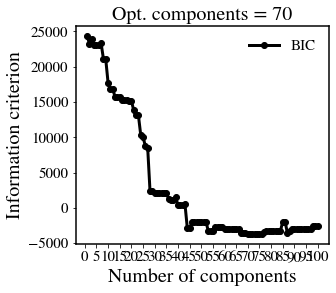

In [228]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.mixture import GaussianMixture as GMM
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

# create the dataset
# x = np.concatenate((np.random.normal(5, 5, 1000), np.random.normal(10, 2, 1000)))
# x = data['Conteggio'].values
x = x.reshape(-1, 1)

# first of all, let's confirm the optimal number of components
bics = []
min_bic = 0
counter=1
N = 100
for i in range (N): # test the AIC/BIC metric between 1 and 10 components
  gmm = GMM(n_components = counter, max_iter=1000, random_state=0, covariance_type = 'full')
  labels = gmm.fit(x).predict(x)
  bic = gmm.bic(x)
  bics.append(bic)
  if bic < min_bic or min_bic == 0:
    min_bic = bic
    opt_bic = counter
  counter = counter + 1


# plot the evolution of BIC/AIC with the number of components
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1,2,1)
# Plot 1
plt.plot(np.arange(1,N+1), bics, 'o-', lw=3, c='black', label='BIC')
plt.legend(frameon=False, fontsize=15)
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Information criterion', fontsize=20)
plt.xticks(np.arange(0,N+1, 5))
plt.title('Opt. components = '+str(opt_bic), fontsize=20)



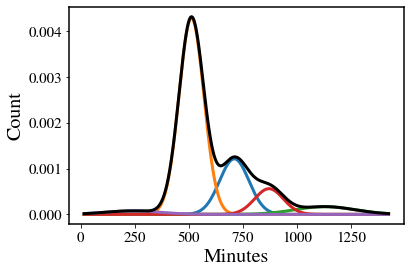

Gaussian 1
Mean: 709.8528449513958
Variance: 4585.8534277615745
Weight: 0.20581791832370647


Gaussian 2
Mean: 511.78171221881877
Variance: 3302.1845982154887
Weight: 0.6180556248055642


Gaussian 3
Mean: 1128.61353519831
Variance: 18962.11441873928
Weight: 0.05841304716233992


Gaussian 4
Mean: 870.2464939442704
Variance: 4392.811540386729
Weight: 0.09315243774004309


Gaussian 5
Mean: 240.59446491336612
Variance: 16107.179324267072
Weight: 0.024560971968345825




In [289]:

# Since the optimal value is n=2 according to both BIC and AIC, let's write down:
# n_optimal = opt_bic
# n_optimal = 25
n_optimal = 5
# n_optimal = 10

# create GMM model object
gmm = GMM(n_components = n_optimal, max_iter=1000, random_state=10, covariance_type = 'full')

# find useful parameters
mean = gmm.fit(x).means_  
covs  = gmm.fit(x).covariances_
weights = gmm.fit(x).weights_

# create necessary things to plot
x_axis = np.linspace(np.min(x), np.max(x), 1000).reshape(-1, 1)
y_axis = []
for i in range(n_optimal):
  y_axis.append(norm.pdf(x_axis, float(mean[i][0]), np.sqrt(float(covs[i][0][0])))*weights[i])
y_total = np.sum(y_axis, axis=0)
ax = fig.add_subplot(1,2,2)

# Plot 2
# bins = np.linspace(np.min(x), np.max(x), 1)
# plt.hist(x, density=True, color='black', bins=1440, alpha=0.5, label='Data')
for i in range(n_optimal):
  plt.plot(x_axis, y_axis[i], lw=3, label='Gaussian '+str(i+1))
plt.plot(x_axis, y_total, lw=3, label='Total', c='black')

# plt.xlim(-10, 20)
# plt.ylim(0.0, 0.002)
plt.xlabel(r"Minutes", fontsize=20)
plt.ylabel(r"Count", fontsize=20)

plt.subplots_adjust(wspace=0.3)
plt.show()
plt.close('all')

# for each gaussian
for i in range(n_optimal):
  print('Gaussian', i+1)
  print('Mean:', mean[i][0])
  print('Variance:', covs[i][0][0])
  print('Weight:', weights[i])
  print('\n')

In [302]:
predicted_counts = []
# use gmm to predict the counts
# use obly first gaussian component

# '8:00' -> 480
minutes = 480

def normalize_count(gmm, count):
    count = count / total_area * total_counts
    return count

def get_predicted_count2(gmm, minutes):
    count = gmm.predict([[minutes]])[0]
    count = normalize_count(gmm, count)
    # count = round(mean[count][0])
    # count = int(count)
    return count

sum_counts = 0
for i in range(1440):
    minutes = i
    count = get_predicted_count2(gmm, minutes)
    print('Predicted count at', minutes, 'is', count)
    sum_counts += count
    
    # predicted_counts.append(count)

print('Total predicted counts:', sum_counts)
# predicted_counts = gmm.predict([[i] for i in range(1440)])
    
    
# predicted_counts = np.array(predicted_counts)

# print('Predicted counts:', predicted_counts)
# print('Total predicted counts:', np.sum(predicted_counts))
# print('Real counts:', data['Conteggio'].values)
# print('Total real counts:', np.sum(data['Conteggio'].values))


Predicted count at 0 is 43.38920971371385
Predicted count at 1 is 43.38920971371385
Predicted count at 2 is 43.38920971371385
Predicted count at 3 is 43.38920971371385
Predicted count at 4 is 43.38920971371385
Predicted count at 5 is 43.38920971371385
Predicted count at 6 is 43.38920971371385
Predicted count at 7 is 43.38920971371385
Predicted count at 8 is 43.38920971371385
Predicted count at 9 is 43.38920971371385
Predicted count at 10 is 43.38920971371385
Predicted count at 11 is 43.38920971371385
Predicted count at 12 is 43.38920971371385
Predicted count at 13 is 43.38920971371385
Predicted count at 14 is 43.38920971371385
Predicted count at 15 is 43.38920971371385
Predicted count at 16 is 43.38920971371385
Predicted count at 17 is 43.38920971371385
Predicted count at 18 is 43.38920971371385
Predicted count at 19 is 43.38920971371385
Predicted count at 20 is 43.38920971371385
Predicted count at 21 is 43.38920971371385
Predicted count at 22 is 43.38920971371385
Predicted count at 23

In [301]:
# get total area under the curve
total_area = 0
for i in range(n_optimal):
    total_area += weights[i] * np.sqrt(2 * np.pi * covs[i][0][0]) 
print('Total area under the curve:', total_area)

total_counts = np.sum(data['Conteggio'].values)
print('Total counts:', total_counts)

Total area under the curve: 167.41489526839888
Total counts: 1816
